In [1]:
import sqlite3
import pandas as pd
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line, ylim

In [2]:
DATABASE_DIR='/home/bn/PycharmProjects/trading/oanda/PGPortfolio/database/Data.db'

In [3]:
connection = sqlite3.connect(DATABASE_DIR)

In [4]:
sql = (
    """SELECT DATETIME(ROUND(date), 'unixepoch') AS isodate
     , date
    , coin
    , close
       FROM History
"""
)

In [ ]:
sql2 = (
"""
select t1.*
    ,t1.close / t1.prev_close as r_close
   from
                 (select DATETIME(ROUND(date), 'unixepoch') AS isodate
     , date
    , coin
    , close
  , (select close
   from History b
   where b.date = a.date - 300
      and b.coin = a.coin) as prev_close
from History a)
as t1
order by t1.coin, t1.date ;

select t2.* from
                 (select t1.*
    ,t1.close / t1.prev_close as r_close
   from
                 (select DATETIME(ROUND(date), 'unixepoch') AS isodate
     , date
    , coin
    , close
  , (select close
   from History b
   where b.date = a.date - 300
      and b.coin = a.coin) as prev_close
from History a)
as t1 ) as t2
where t2.r_close > 2
order by t2.coin, t2.date
""")

In [5]:
# df: pd.DataFrame = pd.read_sql_query(sql, con=connection, parse_dates=["isodate"])

In [6]:
# df.to_feather('/home/bn/PycharmProjects/trading/oanda/PGPortfolio/database/Data.feather')

In [7]:
df= pd.read_feather('/home/bn/PycharmProjects/trading/oanda/PGPortfolio/database/Data.feather')

In [8]:
df = df.set_index('date')

In [9]:
df

,isodate,coin,close
date,,,
1439010600,2015-08-08 05:10:00,ETH,0.009000
1439010900,2015-08-08 05:15:00,ETH,0.009000
1439011200,2015-08-08 05:20:00,ETH,0.009010
1439011500,2015-08-08 05:25:00,ETH,0.005501
1439011800,2015-08-08 05:30:00,ETH,0.009300
...,...,...,...
1577831700,2019-12-31 22:35:00,ATOM,0.000585
1577832000,2019-12-31 22:40:00,ATOM,0.000585
1577832300,2019-12-31 22:45:00,ATOM,0.000585


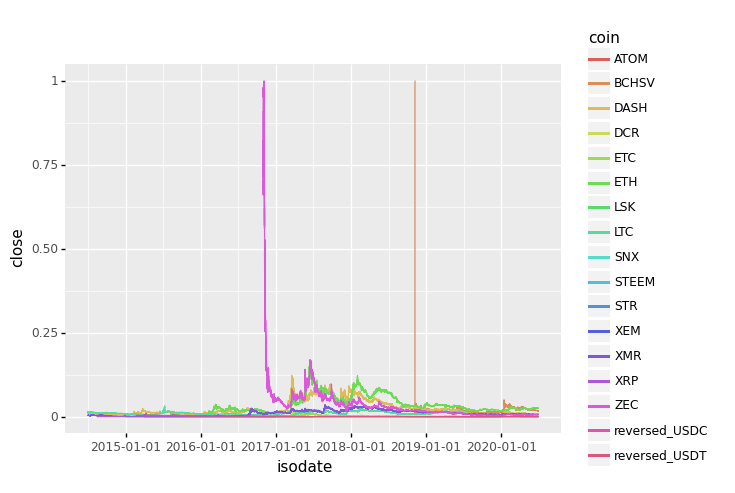

<ggplot: (8785077101508)>

In [10]:
(
    ggplot(df)  # What data to use
    + aes(x="isodate", y="close", color="coin")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
    + ylim(0, 1)
)